<a href="https://colab.research.google.com/github/Shreyas-13/Tensorflow-Developer/blob/main/01_NN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.8.2


## Introduction to Regression using TF

Predicting the value of dependent variable based on some independent variables

### Creating Data to Fit

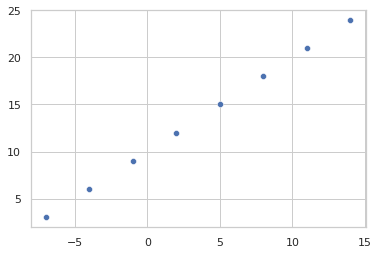

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

X = np.arange(-7.0, 15.0, 3.0)
y = np.arange(3, 25, 3)

sns.scatterplot(x=X, y=y)

### Input And Output Shape

One of the most important concepts when working with neural networks are the `input` and `output` shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [3]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

Here the input shape is `(3, )` and the output shape is `(1, )`


Our goal here will be to use X to predict y.

So our input will be X and our output will be y.

Knowing this, what do you think our input and output shapes will be?

Let's take a look.


In [4]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)


((), ())



Huh?

From this it seems our inputs and outputs have no shape?

How could that be?

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as ouput some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.


In our case, we're trying to build a model to predict the pattern between `X[0]` equalling `-7.0` and `y[0]` equalling `3.0.`

So now we get our answer, we're trying to use `1 X` value to predict `1 y` value.

You might be thinking, "this seems pretty complicated for just predicting a straight line...".

And you'd be right.

But the concepts we're covering here, the concepts of input and output shapes to a model are fundamental.

In fact, they're probably two of the things you'll spend the most time on when you work with neural networks: making sure your input and outputs are in the correct shape.

In [5]:
##Turn numpy array to tensors

X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

We are making use on `1 X` value to predict `1 y` value

### Steps in modelling with TensorFlow

1. **Creating the model** - Define the input, output and hidden layers.

2. **Compile the model** - Define the loss function(how wrong our model is), the optimizer(how to improve the model) and the evaluation metrics

3. **Fitting a model** - Allowing the model to find patterns between X and y

In [6]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 1, input_shape=[1])
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(X,y, epochs=6)

'''Another Way:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=[1]))
##We can keep on adding multiple layers
model.compile(.....)
model.fit(......)
'''
print('Prediction = ', model.predict([17]))

Epoch 1/6
1/1 [==============================] - 1s 556ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/6
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/6
1/1 [==============================] - 0s 14ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/6
1/1 [==============================] - 0s 13ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/6
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/6
1/1 [==============================] - 0s 12ms/step - loss: 10.8423 - mae: 10.8423
Prediction =  [[13.321021]]


We have set `units = 1` coz we are making use of a single neuron to make prediction for each input 

In [7]:
##Trying to fit the same data using Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.numpy().reshape(-1,1),y)
print('Prediction = ', lr.predict([[17.0]]))
print('Coefficient- ', lr.coef_, 'Intercept- ', lr.intercept_)

Prediction =  [27.]
Coefficient-  [1.] Intercept-  10.0


### Improving our Deep Learning Model

1. **Creating a model** - Add more layers, increase hidden units and change the activation function of each layer.

2. **Compiling a model** - Change optimization function or perhaps the learning rate.

3. **Fitting the model** - Run for more epochs or add more data for training

In [8]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1]),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(100, activation='relu'),
                            #  tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mean_squared_error,
              optimizer=tf.keras.optimizers.Adam(lr=.01),
              metrics=['mse']
              )

model.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 505ms/step - loss: 247.1779 - mse: 247.1779
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 187.9903 - mse: 187.9903
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 141.9341 - mse: 141.9341
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 105.3785 - mse: 105.3785
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 72.2983 - mse: 72.2983
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 43.8231 - mse: 43.8231
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 24.6989 - mse: 24.6989
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 22.9831 - mse: 22.9831
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 38.8598 - mse: 38.8598
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 51.5460 - mse: 51.5460
Epoch 11/100
1/1 [==============================] - 0

In [9]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [10]:
model.predict([17.0])

array([[27.25651]], dtype=float32)

### Evaluating a model

```
Build -> Fit -> Evaluate -> Tweak -> Repeat
```
Key aspect is to:

> Visualize the data

> Visualize the model itself

> Visualize the training phase

> Visualize the results

In [ ]:
X = tf.range(-100, 100, 4)
y = X+10
X,y


In [ ]:
## Visulaize the data
sns.scatterplot(x=X, y=y)

#### The 3 Sets:
1. **Training Set** - 70-80 percent data
2. **Validation Set** - 10-15 percent of the available data
3. **Test Set** - 10-15 percent of the available data

In [ ]:
##We create train and test set cz of small dataset and hence no validation set

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

####Visualize

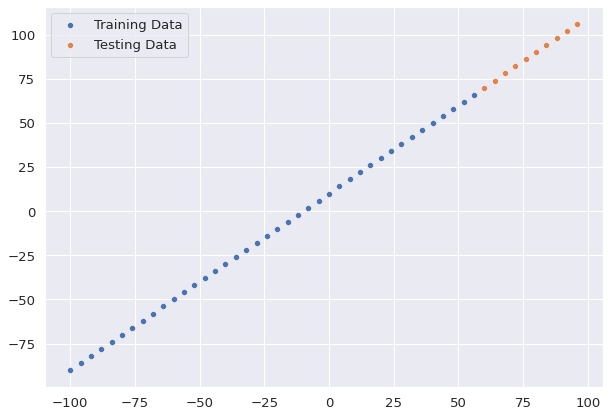

In [55]:
##THE DATA

plt.figure(figsize=(10,7))
sns.set_theme(style='darkgrid', font_scale=1.2)

##Plot training data
sns.scatterplot(x=X_train, y=y_train, label='Training Data')
##Plot testing data
sns.scatterplot(x=X_test, y=y_test, label='Testing Data')

In [56]:
##Create a model for the data
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1]),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(1)
])
model.compile(loss='mae', optimizer='Adam', metrics='mae')

##Visulaizing the model
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
 dense_21 (Dense)            (None, 100)               200       
                                                                 
 dense_22 (Dense)            (None, 1)                 101       
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


*  Trainable Parameters - Parameters that can be changed

*  Non-Trainable Parameters - Parameters that can't be changed. (Used when you use **transfer learning** and you don't want to change the params that the model has already learnt)

In [57]:
model.fit(X_train, y_train, epochs=100, verbose=0)

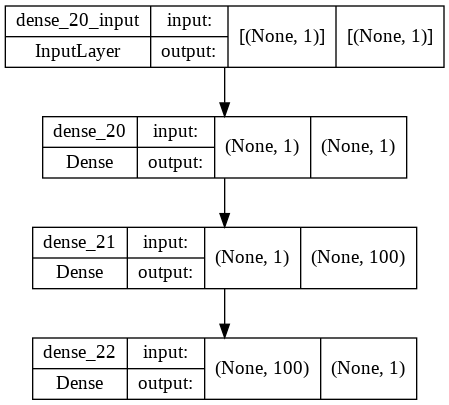

In [58]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

####Visulaize model's prediction

It is good to plot `y_pred` against `y_true`

In [59]:
y_pred = model.predict(X_test)
y_pred

array([[ 73.041275],
       [ 77.78419 ],
       [ 82.52709 ],
       [ 87.270004],
       [ 92.01292 ],
       [ 96.75584 ],
       [101.49875 ],
       [106.24166 ],
       [110.98457 ],
       [115.7275  ]], dtype=float32)

In [60]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [61]:
###Plotting Function

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     prediction=y_pred):
  plt.figure(figsize=(10,7))
  ##Plot training data
  sns.scatterplot(x=train_data, y=train_labels, label='Train Data')
  ##Plot test data
  sns.scatterplot(x=test_data, y=test_labels, label='Test Data')
  ##Plot prediction
  sns.scatterplot(x=test_data, y=prediction.ravel(), label='Predictions')

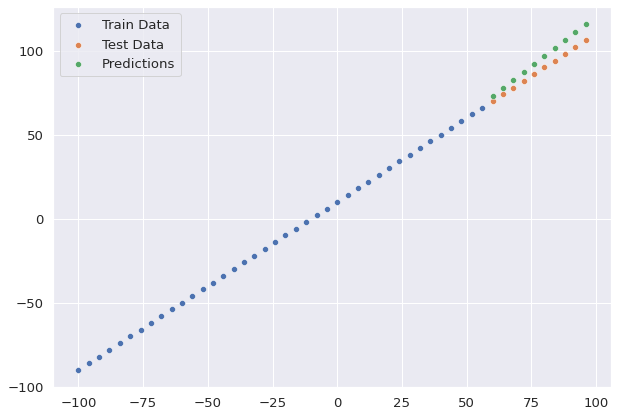

In [62]:
plot_predictions()